<a href="https://colab.research.google.com/github/jeya014/Intelligent-Garbage-Classification-using-Deep-Learning/blob/main/nmC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [5]:
df = pd.read_csv("Housing.csv")
print(f"Dataset Shape: {df.shape}")
print("Dataset Head:")


Dataset Shape: (545, 13)
Dataset Head:


In [6]:
missing_percent = df.isnull().mean() * 100
columns_to_drop = missing_percent[missing_percent > 40].index
df = df.drop(columns=columns_to_drop, axis=1)

# Impute missing values for numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy="median")
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Drop non-numeric or categorical columns for simplicity
df = df.select_dtypes(include=['float64', 'int64'])

# Check for missing values after cleaning
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")

Remaining Missing Values: 0


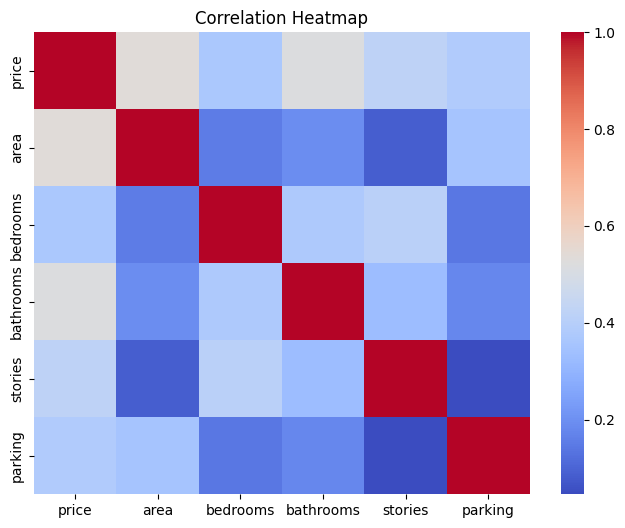

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()




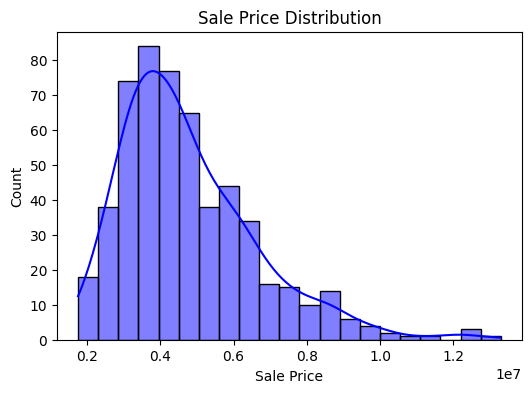

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.show()



In [18]:
X = df.drop("price", axis=1)
y = df["price"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [20]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 1120727.52
R-squared Score: 0.41


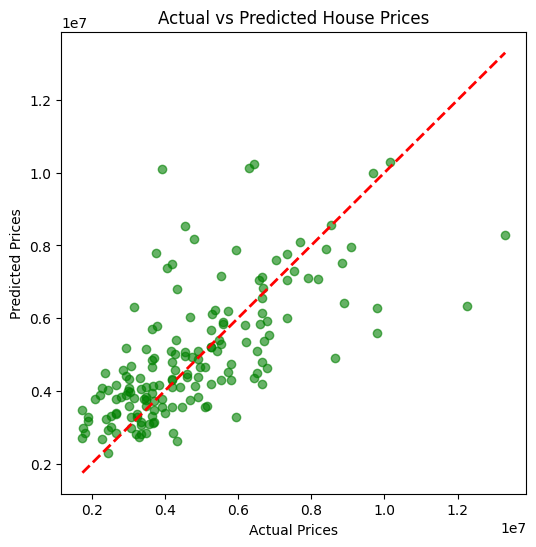

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()